In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from pybind_util import Util

util = Util()

initial [Util] for image processing


In [12]:
util = Util()
ori = util.read_gdal_mul("/data/dataset/project/1-MUL.TIF")
sr = util.read_gdal_mul("/data/dataset/project/res/MUX_0.175_old.tiff")
ori = ori / ori.max()
sr = sr / sr.max()

initial [Util] for image processing


(<Axes: title={'center': 'hq'}>,
 Text(0.5, 1.0, 'hq'))

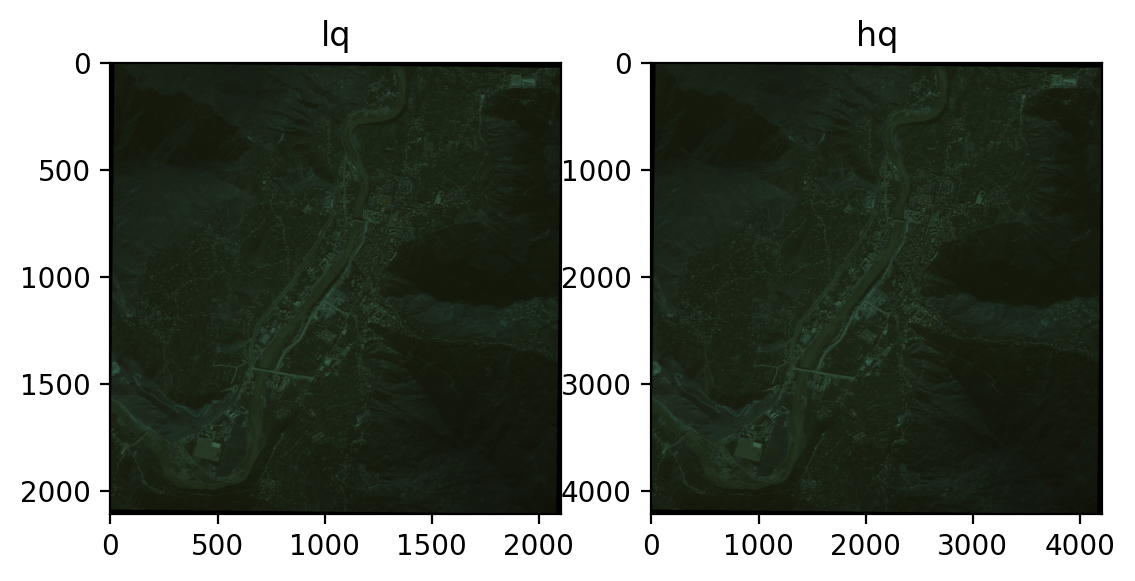

In [13]:
plt.figure(dpi=200)
plt.subplot(121), plt.imshow(ori[:, :, :3]), plt.title('lq')
plt.subplot(122), plt.imshow(sr[:, :, :3]), plt.title('hq')

In [ ]:
plt.imshow(hq[:, :, :3])